In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [156]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./Credible/*.csv')
credible = {}
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)
    credible[path.split('\\')[-1][:-4]] = covid.drop(['name'], axis = 1)

credible_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in credible_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

credible_df["date"] = dates


In [157]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
news = {}
df_ls = []

for path in df_path:
    if "wire" in path: # this is saved in a different format for some reason, skip for now
        continue
    df = pd.read_csv(path)
    df = df[['name','tweet', 'date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)
    news[path.split('\\')[-1][:-4]] = covid.drop(['name'], axis = 1)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates


C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [158]:
# Individual
df_path = glob.glob('./Political/*.csv')
ind = {}
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)
        news[path.split('\\')[-1][:-4]] = covid.drop(['name'], axis = 1)
    except:
        continue

# other datasets in ./Political/datasets_other_format.txt, dunno how to parse
"""file = open("./Political/datasets_other_format.txt")
other = file.readlines()
other = [name.rstrip() for name in other]"""

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates

<p> Problem Datasets: </p>

<ul>
<li> kayleighmcenany </li>
<li> LeaderMcConnell </li>
<li> prager </li>
<li> RepMattGaetz </li>
<li> scrowder </li>
<li> tedcruz </li>
</ul>

In [159]:
# fake tweets from CoAID-master
claim_fake = glob.glob("./CoAID-master/*/ClaimFakeCOVID-19_tweets_hydrated.csv")
claim_fake_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_fake:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    claim_fake_dfs.append(df)

claim_fake_dfs = pd.concat(claim_fake_dfs)

# fix date

dates = claim_fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

claim_fake_dfs["date"] = dates
claim_fake_dfs = claim_fake_dfs.drop("created_at", axis=1)

In [160]:
# real tweets from CoAID-master
claim_real = glob.glob("./CoAID-master/*/ClaimRealCOVID-19_tweets_hydrated.csv")
claim_real_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    claim_real_dfs.append(df)

claim_real_dfs = pd.concat(claim_real_dfs)

# fix date

dates = claim_real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

claim_real_dfs["date"] = dates
claim_real_dfs = claim_real_dfs.drop("created_at", axis=1)

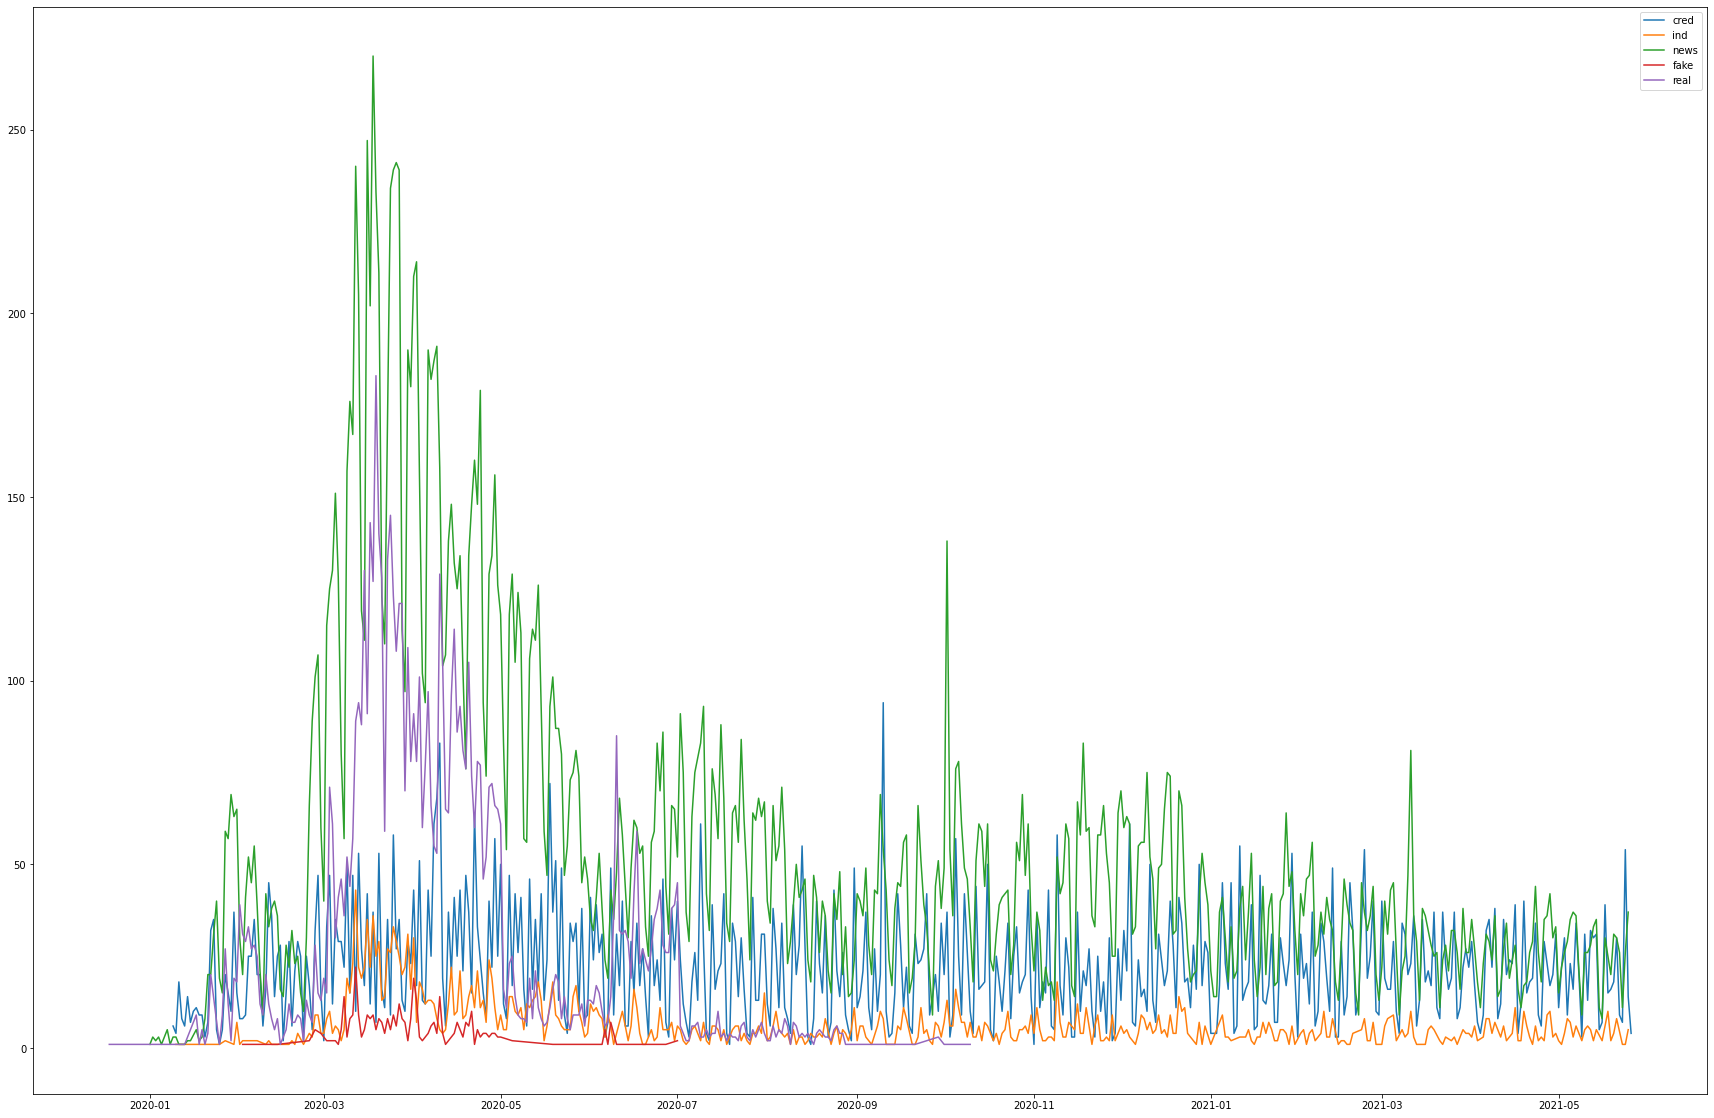

In [162]:
credible_dates = credible_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = claim_fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = claim_real_dfs.sort_values("date", ascending=True)["date"].value_counts()

plt.figure(figsize=[30, 20])
credible_dates.sort_index().plot()
ind_dates.sort_index().plot()
news_dates.sort_index().plot()
fake_tweets.sort_index().plot()
real_tweets.sort_index().plot()
plt.legend(["cred", "ind", "news", "fake", "real"])